# Applications Involving Binary Variables
## Capital Budgeting
The Ice-Cold Refrigerator Company is considering investing in several projects that have varying capital requirements over the next four years.

Faced with limited capital each year, management would like to select the most profitable projects that it can afford. The estimated net present value for each project, the capital requirements, and the available capital over the four-year period are shown in the following table.

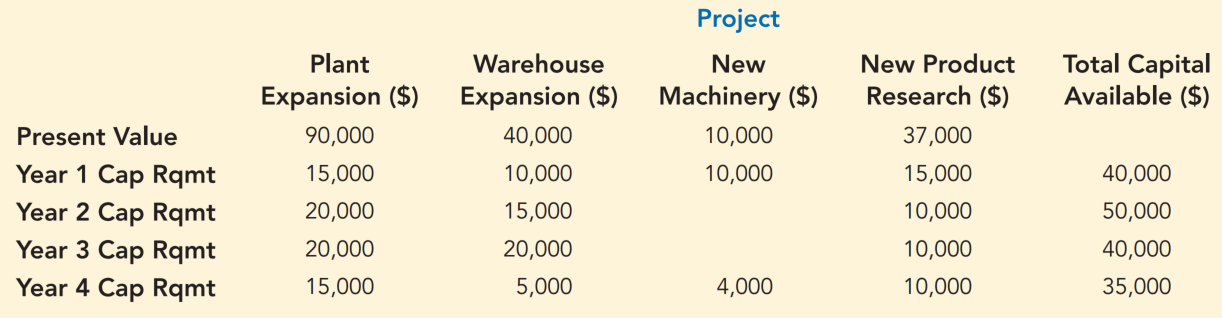

### Let us define four binary decision variables:
<blockquote>
    Hint:
    $P =$ if the plant expansion project is accepted; 0 if rejected
</blockquote>


### What is the Objective Function?
### Is it Minimization or Maximization Problem?
### What are the Constraints?
### Use PuLP to Find the Optimal Solution

In [ ]:
from pulp import *
prob = LpProblem("WaletInvestment", LpMaximize)
p = LpVariable("p", lowBound=0, cat='Binary')
w = LpVariable("w", lowBound=0, cat='Binary')
m = LpVariable("m", lowBound=0, cat='Binary')
r = LpVariable('r', lowBound=0, cat='Binary') 
prob += 90*p + 40*w + 10*m + 37*r  # the new objective function
prob += 15*p + 10*w + 10*m + 15*r <=
prob += p + w <= 
prob += p + w <= 


In [ ]:
status = prob.solve()

print 'Objective Function:', prob.objective
for c in prob.constraints.items():
    print 'Constraint:', c

for v in prob.variables():
    print 'Variable: ', v.name, '=', v.varValue
print
print 'Solution is', LpStatus[status]
print 'Optimal Value:', value(prob.objective)
print
for name, c in prob.constraints.items():
    print 'name:', name, 'Slack:', c.slack

### How much funds are left in year 1? in year 2? in year 3? in year 4?

## Fixed Cost
Consider the production problem faced by RMC Inc. Three raw materials are used to produce three products: a fuel additive, a solvent base, and a carpet cleaning fluid. The following decision variables are used:
- $F =$ tons of fuel additive produced (material 1)
- $S =$ tons of solvent base produced (material 2)
- $C=$ tons of carpet cleaning fluid produced (material 3)

The profit contributions are
- \\$40 per ton for the fuel additive,
- \\$30 per ton for the solvent base, and
- \\$50 per ton for the carpet cleaning fluid.

and
- Each ton of fuel additive is a blend of
    - 0.4 ton of material 1 and
    - 0.6 ton of material 3.
- Each ton of solvent base requires
    - 0.5 ton of material 1,
    - 0.2 ton of material 2, and
    - 0.3 ton of material 3.
- Each ton of carpet cleaning fluid is a blend of
    - 0.6 ton of material 1,
    - 0.1 ton of material 2, and
    - 0.3 ton of material 3.
    
RMC has
- 20 tons of material 1,
- 5 tons of material 2, and
- 21 tons of material 3,

and management is interested in determining the **optimal production quantities** for the upcoming planning period.

### Write the linear programming model of the RMC problem
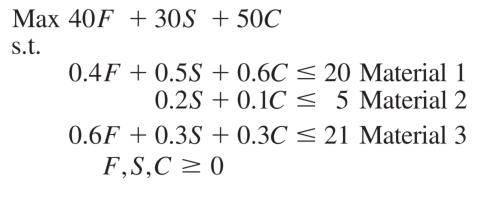

We obtain an optimal solution consisting of
- 27.5 tons of fuel additive,
- 0 tons of solvent base, and
- 15 tons of carpet cleaning fluid,

with a value of $1,850.

### What About Fixed Cost?
Suppose that the following data are available concerning the setup cost and the maximum production quantity for each of the three products:

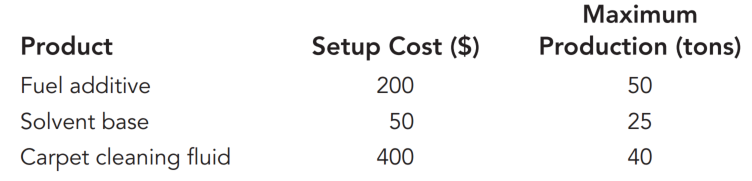

The modeling flexibility provided by binary variables can now be used to incorporate the fixed setup costs into the production model. The binary variables are defined as
follows:

<blockquote>
Hint: $SF=1$ if the fuel additive is produced; $0$ if not
</blockquote>
### Write the Other Decision Variables


#### Dscribe the total setup cost as an objective function:


#### Rewrite the Objective Function for RMC Inc. Problem:


### Define the Relation Between Production Variables and Setup Variables
Next, we must write production capacity constraints so that, if a setup variable equals 0, production of the corresponding product is not permitted, and if a setup variable equals 1, production is permitted up to the maximum quantity.
- $F \leq 50SF$

<blockquote>
Note that, with this constraint present, production of the fuel additive is not permitted when $SF = 0$. When $SF = 1$, production of up to 50 tons of fuel additive is permitted.
    
We can think of the setup variable as a switch. When it is off ($SF = 0$), production is not permitted; when it is on ($SF = 1$), production is permitted.
</blockquote>


#### Similarly, Write the Relationship Among the other Decision Variables


### Write the Problem Definition Taking the Fixed Cost Into Consideration
### Use PuLP to Find the Optimal Solution

In [ ]:
from pulp import *
prob = LpProblem("WaletInvestment", LpMaximize)
f = LpVariable("f", lowBound=0)
s = LpVariable("s", lowBound=0)
c  = LpVariable("c", lowBound=0)

sf = LpVariable("sf", lowBound=0, cat='Binary')
ss = LpVariable("ss", lowBound=0, cat='Binary')
sc  = LpVariable("sc", lowBound=0, cat='Binary')

prob += 40*f + 30*s + 50*c - 200*sf -50*ss - 400*sc # the new objective function
prob += 15*p + 10*w + 10*m + 15*r <=
prob += p + w <= 
prob += p + w <= 


In [ ]:
status = prob.solve()

print 'Objective Function:', prob.objective
for c in prob.constraints.items():
    print 'Constraint:', c

for v in prob.variables():
    print 'Variable: ', v.name, '=', v.varValue
print
print 'Solution is', LpStatus[status]
print 'Optimal Value:', value(prob.objective)
print
for name, c in prob.constraints.items():
    print 'name:', name, 'Slack:', c.slack

### Conclusion
The optimal solution requires
- 25 tons of fuel additive and
- 20 tons of solvent base.

The value of the objective function after deducting the setup cost is $1,350.

The setup cost for the fuel additive and the solvent base is \\$200 + \\$50 = \\$250.

The optimal solution includes $SC = 0$, which indicates that the more expensive \\$400 setup cost for the carpet cleaning fluid should be avoided. Thus, the carpet cleaning fluid is not produced.

## Bank Location
The long-range planning department for the Ohio Trust Company is considering expanding its operation into a 20-county region in northeastern Ohio (see figure below)

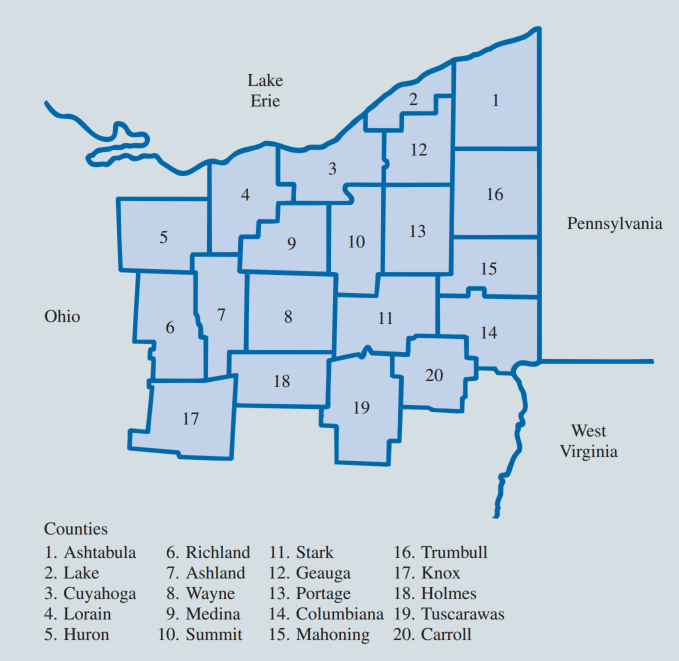

Currently, Ohio
Trust does not have a principal place of business in any of the 20 counties. According to the banking laws in Ohio, if a bank establishes a principal place of business (PPB) in any county, branch banks can be established in that county and in any of the adjacent counties. However, to establish a new principal place of business, Ohio Trust must either obtain approval for a new bank from the state’s superintendent of banks or purchase an existing bank.

The Table below lists the 20 counties in the region and adjacent counties. For example, Ashtabula County is adjacent to Lake, Geauga, and Trumbull counties; Lake County is adjacent to Ashtabula, Cuyahoga, and Geauga counties; and so on.

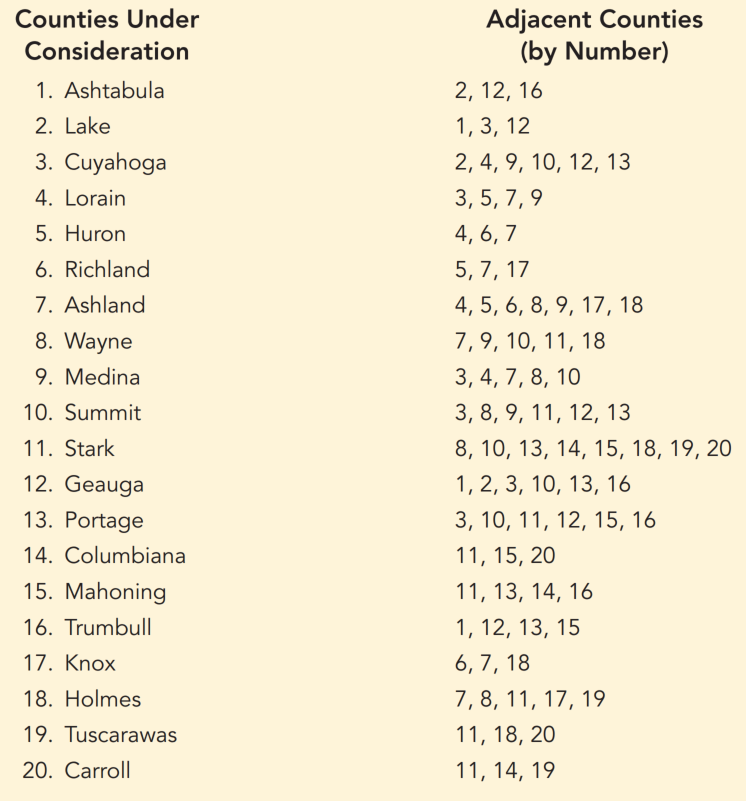

As an initial step in its planning, Ohio Trust would like to determine the minimum number of PPBs necessary to do business throughout the 20-county region. 

#### Define Decision Variables:
A binary integer programming model can be used to solve this **location problem** for Ohio Trust. 



#### Define the Objective Function:
To minimize the number of PPBs needed



#### Define the Constratints:
The bank may locate branches in a county if the county contains a PPB or is adjacent to another county with a PPB. 

<blockquote>
Note that satisfaction of this constraint should ensures that a PPB will be placed in Ashtabula County or in one or more of the adjacent counties. 
</blockquote>

### Write the complete statement of the bank location problem is:


In [ ]:
from pulp import *
prob = LpProblem("Location", LpMinimize)
x1 = LpVariable("x1", cat='Binary')
x2 = LpVariable("x2", cat='Binary')
x3 = LpVariable("x3", cat='Binary')
x4 = LpVariable("x4", cat='Binary')
x5 = LpVariable("x5", cat='Binary')
x6 = LpVariable("x6", cat='Binary')
x7 = LpVariable("x7", cat='Binary')
x8 = LpVariable("x8", cat='Binary')
x9 = LpVariable("x9", cat='Binary')
x10 = LpVariable("x10", cat='Binary')
x11 = LpVariable("x11", cat='Binary')
x12 = LpVariable("x12", cat='Binary')
x13 = LpVariable("x13", cat='Binary')
x14 = LpVariable("x14", cat='Binary')
x15 = LpVariable("x15", cat='Binary')
x16 = LpVariable("x16", cat='Binary')
x17 = LpVariable("x17", cat='Binary')
x18 = LpVariable("x18", cat='Binary')
x19 = LpVariable("x19", cat='Binary')
x20 = LpVariable("x20", cat='Binary')

prob += x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20
prob += x1+x2+x12+x16 >= 1
prob += x2+x1+x3+x12 >= 1
prob += x3+x2+x4+x9+x10+x12+x13 >= 1
prob += x4+x3+x5+x7+x9 >= 1
prob += x5+x4+x6+x7 >= 1
prob += x6+x5+x7+x17 >= 1
prob += x7+x4+x5+x6+x8+x9+x17+x18 >= 1
prob += x8+x7+x9+x10+x11+x18 >= 1
prob += x9+x3+x4+x7+x8+x10 >= 1
prob += x10+x3+x8+x9+x11+x12+x13 >= 1
prob += x11+x8+x10+x13+x14+x15+x18+x19+x20 >= 1
prob += x12+x1+x2+x3+x10+x13+x16 >= 1
prob += x13+x3+x10+x11+x12+x15+x16 >= 1
prob += x14+x11+x15+x20 >= 1
prob += x15+x11+x13+x14+x16 >= 1
prob += x16+x1+x12+x13+x15 >= 1
prob += x17+x6+x7+x18 >= 1
prob += x18+x7+x8+x11+x17+x19 >= 1
prob += x19+x11+x18+x20 >= 1
prob += x20+x11+x14+x19 >= 1

status = prob.solve()

print 'Objective Function:', prob.objective
for c in prob.constraints.items():
    print 'Constraint:', c
print
for v in prob.variables():
    print 'Variable: ', v.name, '=', v.varValue
print 
print 'Solution is', LpStatus[status]
print 'Optimal Value:', value(prob.objective)

The optimal solution calls for principal places of business in Ashland, Stark, and Geauga counties. With PPBs in these three counties, Ohio Trust can place branch banks in all 20 counties.

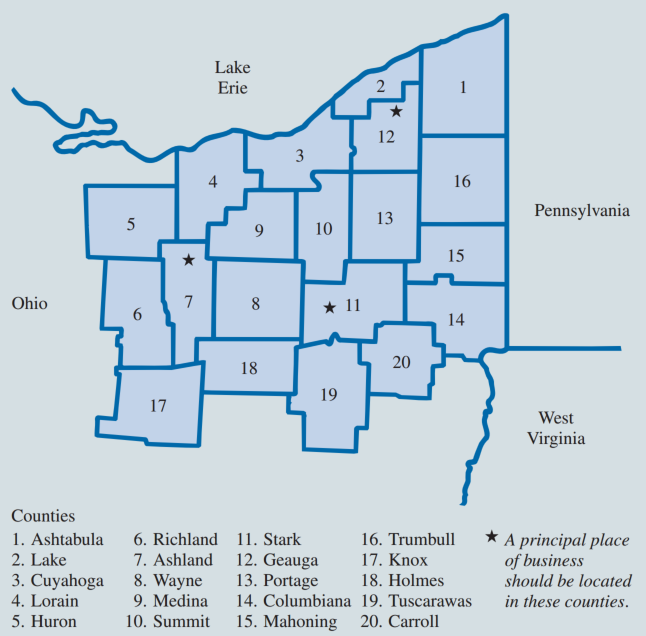

# Modeling Flexibility Provided by Binary Variables
## multiple-Choice and mutually Exclusive Constraints
Recall the Ice-Cold Refrigerator capital budgeting problem introduced in Section 13.4. The decision variables were defined as follows:

- $P =$ if the plant expansion project is accepted; 0 if rejected
- $W =$ if the warehouse expansion project is accepted; 0 if rejected
- $M =$ if the new machinery project is accepted; 0 if rejected
- $R =$ if the new product research project is accepted; 0 if rejected

**Suppose that, instead of one warehouse expansion project, the Ice-Cold Refrigerator Company actually has three warehouse expansion projects under consideration. One of the warehouses must be expanded because of increasing product demand, but new demand is not sufficient to make expansion of more than one warehouse necessary.**

The following variable definitions and multiple-choice constraint could be incorporated into the previous binary integer linear programming model to reflect this situation. 

- $W_1=1$ if the original warehouse expansion project is accepted; 0 if rejected
- $W_2=1$ if the second warehouse expansion project is accepted; 0 if rejected
- $W_3=1$ if the third warehouse expansion project is accepted; 0 if rejected

### Multiple Choice Constraints
The multiple-choice constraint reflecting the requirement that exactly one of these projects
must be selected is
<center>$W_1 + W_2 + W_3 = 1$</center>
If $W_1$, $W_3$, and $W_3$ are allowed to assume only the values 0 or 1, then one and only one of these projects will be selected from among the three choices.
### Mutually Exclusive Constraints
If the requirement that one warehouse must be expanded did not exist, the multiple-choice constraint could be modified as follows:
<center>$W_1 + W_2 + W_3 \leq 1$</center>
This modification allows for the case of no warehouse expansion ($W_1 = W_2 = W_3 = 0$) but does not permit more than one warehouse to be expanded.

### _k_ Out of _n_ Alternatives Constraints
An extension of the notion of a multiple-choice constraint can be used to model situations in which $k$ out of a set of $n$ projects must be selected. Suppose that $W_1, W_2, W_3, W_4$, and $W_5$ represent five potential warehouse expansion projects
and that two of the five projects must be accepted. The constraint that satisfies this new requirement is
<center>$W_1 + W_2 + W_3 + W_4 + W_5 = 2$</center>
If no more than two of the projects are to be selected, we would use the following lessthan-or-equal-to constraint:
<center>$W_1 + W_2 + W_3 + W_4 + W_5 \leq 2$</center>

### Conditional Constratints:
Suppose that for the Ice-Cold Refrigerator Company, the warehouse expansion project was conditional on the plant expansion project. In other words, suppose management will not consider expanding the warehouse unless the plant is expanded. it is often helpful to construct a feasibility table. 

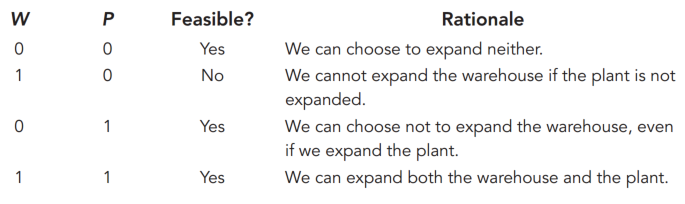

Notice that W is less than or equal to P for the feasible cases and W is greater than P in the infeasible case. Hence, the conditional constraint that enforces the restriction is
<center>$W \leq P$</center>

### Corequisite Constraints
Let us consider another situation where the warehouse and plant expansions are dependent on each other. If the warehouse expansion project had to be accepted whenever the plant expansion project was accepted, and vice versa, we would say that we have a corequisite constraint. So, if we choose to expand either, the other must be expanded. In this situation, we have the following feasibility table:

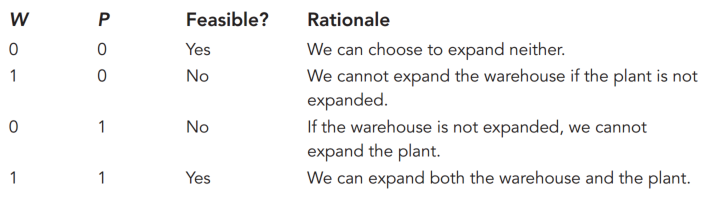

we see that when W and P are set to the same value, the result is feasible, but different settings of W and P are infeasible. Hence, in the corequisite situation, the following constraint enforces the restriction:
<center>$W = P$</center>

# Generating Alternatives in Binary Optimization
let us reconsider the Ohio Trust location problem presented above. The solution for the minimum number of principle places of business (PPBs) is three. As we say, the solution is to place PBBs in county 7 (Ashland), county 11 (Stark), and county 12 (Geauga). However, suppose when Ohio Trust tries to implement this solution, it is not possible to find a suitable location for a PPB in one of these three counties. **Are there other alternative solutions of three counties, or is this a unique optimal solution?**

The current solution for Ohio Trust can be broken into two sets of variables: those that are set to one and those that are set to zero. Let the set O denote the set of variables set to one and the set Z those that are set to zero. For the Ohio Trust solution, these sets are as follows:
- Set $O: x_{7},x_{11},x_{12}$
- Set $Z: x_{1},x_{2},x_{3},x_{4},x_{5},x_{6},x_{8},x_{9},x_{10},x_{13},x_{14},x_{15},x_{16},x_{17},x_{18},x_{19},x_{20}$

Then we add the following constraint:
<center>(Sum of variables in the set $O$) - (sum of variables in the set $Z$) $\leq$ (number of variables in the set $O$) - 1</center>
Which for our current solution is
<center>$x_{7}+x_{11}+x_{12}-x_{1}-x_{2}-x_{3}-x_{4}-x_{5}-x_{6}-x_{8}-x_{9}-x_{10}-x_{13}-x_{14}-x_{15}-x_{16}-x_{17}-x_{18}-x_{19}-x_{20} \leq 3-1 = 2$</center>

<blockquote>
This constraint has the very special property that it makes the current solution infeasible, but keeps feasible all other solutions that are feasible to the original problem. 

This constraint will force (at least) one of the variables in set $O$ to change from one to zero or will force (at least) one of the variables in set $Z$ to change from zero to one.
</blockquote>

#### In Summary
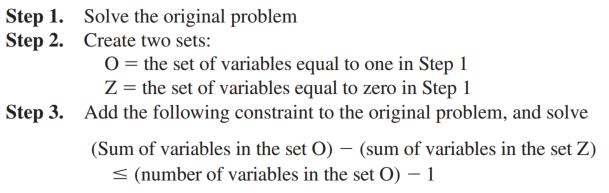

<p style="color:red;">Find the alternative solution for the Bank Location Problem and discuss the result.</p>

<blockquote>
Notice that the optimal value has change to 4. This tells us that the solution we found earlier with objective function value 
equal to 3 is a unique optimal solution.
</blockquote>
    
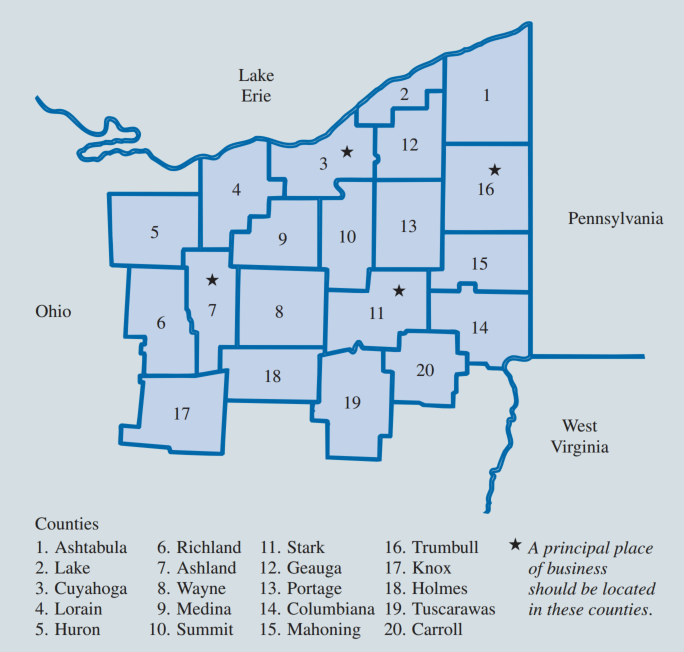